In [2]:
import math
import random
from sklearn import datasets
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rc('font', family='SimHei')

### 1. 数据读取与展示

In [3]:
air_data_path='./air_data.csv'
air_data=pd.read_csv(air_data_path,encoding='utf-8')#.sample(n=1500)
air_data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,2011/5/20,2013/6/5,女,4,广州,广东,CN,25.0,2014/3/31,...,12318,12318,12123,12318,12123,1.000000,0.000000,0.000000,0.000000,22
62984,36041,2010/3/8,2013/9/14,男,4,佛山,广东,CN,38.0,2014/3/31,...,106972,106972,56506,106972,56506,1.000000,0.000000,0.000000,0.000000,43
62985,45690,2006/3/30,2006/12/2,女,4,广州,广东,CN,43.0,2014/3/31,...,0,0,0,0,0,1.000000,0.000000,0.000000,0.000000,0
62986,61027,2013/2/6,2013/2/14,女,4,广州,广东,CN,36.0,2014/3/31,...,0,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0


In [4]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1              

### 2. 描述性统计分析

In [5]:
explore=air_data.describe(percentiles=[],include='all').T
explore['null']=len(air_data)-explore['count']
explore=explore[['null','max','min']]
explore.columns=[u'空值数',u'最大值',u'最小值']
explore

,空值数,最大值,最小值
MEMBER_NO,0,62988,1
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0,6,4
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420,110,6
LOAD_TIME,0,NaN,NaN


### 3. 分布分析

#### (1)客户基本信息分布分析
选取客户基本信息的入会时间、会员卡级别和年龄字段进行探索分析，探索客户的基本信息分布情况

Text(0.5, 1.0, '各年份会员入会人数')

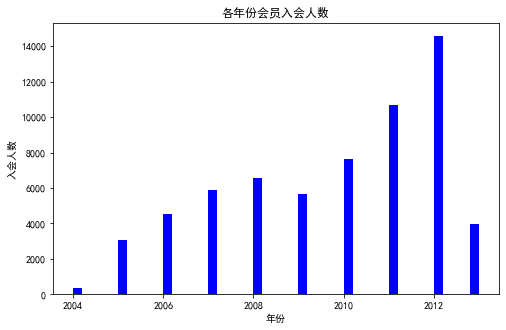

In [6]:
from datetime import datetime
ffp=air_data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
ffp_year=ffp.map(lambda x :x.year)

fig=plt.figure(figsize=(8,5))
plt.hist(ffp_year,bins='auto',color='blue')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')

Text(0.5, 1.0, '会员性别比例')

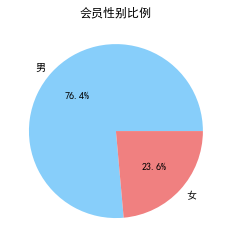

In [7]:
# 提取会员不同性别人数
male = pd.value_counts(air_data['GENDER'])['男']
female = pd.value_counts(air_data['GENDER'])['女']

fig = plt.figure(figsize=(7,4))
# autopct 控制饼图内百分比设置
plt.pie([male,female],labels=['男','女'],
                 colors=['lightskyblue', 'lightcoral'],
                 autopct='%1.1f%%')

plt.title('会员性别比例')

从图中可以看出从04年到12年会员入会人数逐渐增加，但到13年会员入会人数急剧减少。可以判断出该航空公司近两年发展不是很好。

In [8]:
type=air_data['FFP_TIER'].value_counts()
type

4    58066
5     3409
6     1513
Name: FFP_TIER, dtype: int64

Text(0.5, 1.0, '各个等级的会员数量')

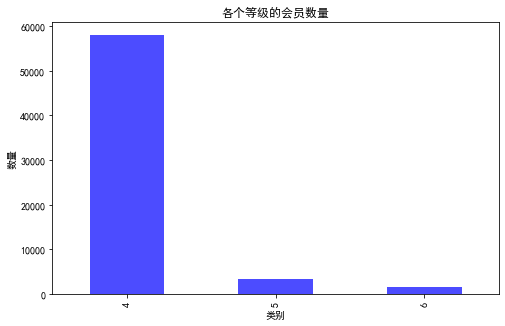

In [9]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(1,1,1)
type.plot(kind='bar',color='blue',alpha=0.7)
ax.set_xlabel('类别')
ax.set_ylabel('数量')
ax.set_title('各个等级的会员数量')

会员等级越高说明此客户对本公司的忠诚度越高，贡献越大。从图表可以看出6级会员占比大概2.4%，5级会员占比大概5.4%，4级占比大概92.2%

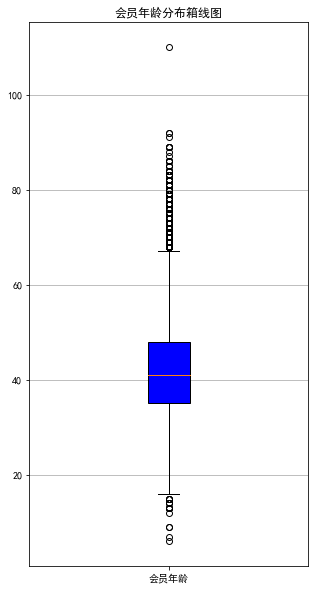

In [10]:
age=air_data['AGE'].dropna()
age=age.astype('int64')
fig=plt.figure(figsize=(5,10))
plt.boxplot(age,
           patch_artist=True,
           labels=['会员年龄'],
           boxprops={'facecolor':'blue'})
plt.title('会员年龄分布箱线图')
plt.grid(axis='y')

#### (2) 客户乘机信息分布分析

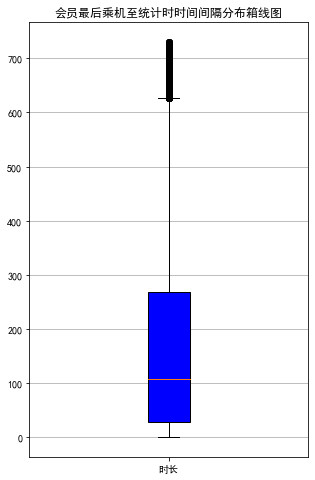

In [11]:
lte=air_data['LAST_TO_END']
fc=air_data['FLIGHT_COUNT']
sks=air_data['SEG_KM_SUM']
fig=plt.figure(figsize=(5,8))
plt.boxplot(lte,patch_artist=True,labels=['时长'],boxprops={'facecolor':'blue'})
plt.title('会员最后乘机至统计时时间间隔分布箱线图')
plt.grid(axis='y')

绘制最后乘机时间至统计时时间间隔箱线图,由图可知: 客户的入会时长主要分布在50～300区间内，另外有一部分客户群体的入会时长分布在600以上的区间，可分为两个群体。

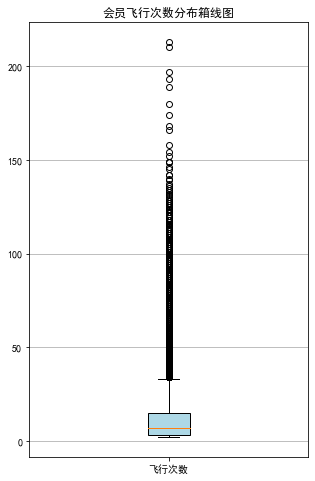

In [12]:
fig=plt.figure(figsize=(5,8))
plt.boxplot(fc,patch_artist=True,labels=['飞行次数'],boxprops={'facecolor':'lightblue'})
plt.title('会员飞行次数分布箱线图')
plt.grid(axis='y')

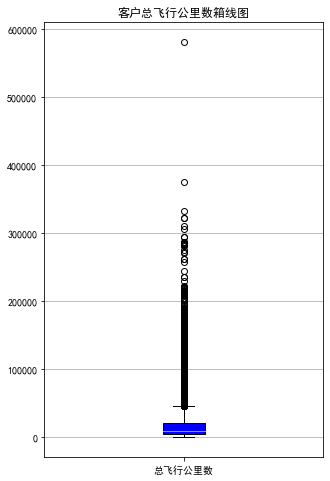

In [13]:
fig=plt.figure(figsize=(5,8))
plt.boxplot(sks,patch_artist=True,labels=['总飞行公里数'],boxprops={'facecolor':'blue'})
plt.title('客户总飞行公里数箱线图')
plt.grid(axis='y')

客户的飞行次数与总飞行公里数也明显地分为两个群体，大部分客户集中在箱型图下方的箱体中，少数客户分散分布在箱体上界的上方，这部分客户很可能是高价值客户，因为其飞行次数和总飞行公里数明显超过箱体内的其他客户

f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


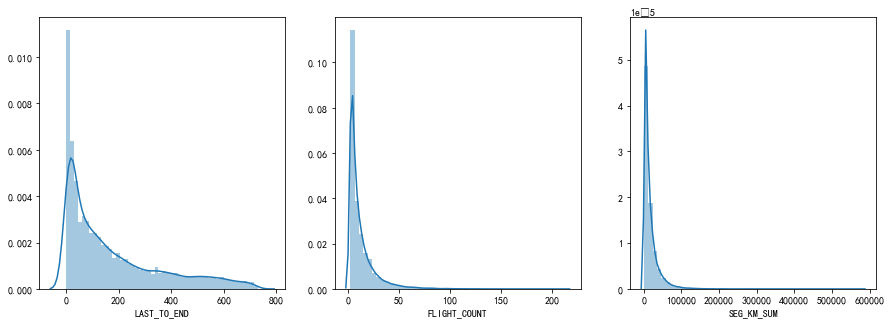

In [14]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
sns.distplot(air_data['LAST_TO_END'])
ax2=fig.add_subplot(1,3,2)
sns.distplot(air_data['FLIGHT_COUNT'])
ax3=fig.add_subplot(1,3,3)
sns.distplot(air_data['SEG_KM_SUM'])


通过观察RFM的分布，可以看到大部分乘机的时间间隔距离0-400天，乘机频率大都在0-25次以内，总飞行里程数基本上都在0-100000公里以内，少量达到150000公里.

#### 3）客户积分信息分布分析
绘制会员兑换积分次数直方图,绝大部分客户的兑换次数在0～10的区间内，这表示大部分客户都很少进行积分兑换

Text(0.5, 1.0, '会员兑换积分次数分布直方图')

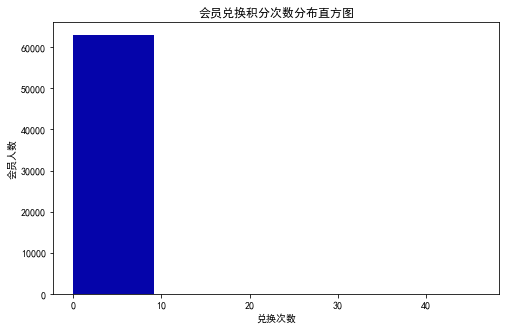

In [15]:
# 提取会员积分兑换次数
ec = air_data['EXCHANGE_COUNT']

fig = plt.figure(figsize = (8 ,5))  # 设置画布大小
plt.hist(ec, bins=5, color='#0504aa')
plt.xlabel('兑换次数')
plt.ylabel('会员人数')
plt.title('会员兑换积分次数分布直方图')

绘制会员总累计积分箱线图,一部分客户集中在箱体中，少部分客户分散分布在箱体上方，这部分客户的积分要明显高于箱体内的客户的积分。

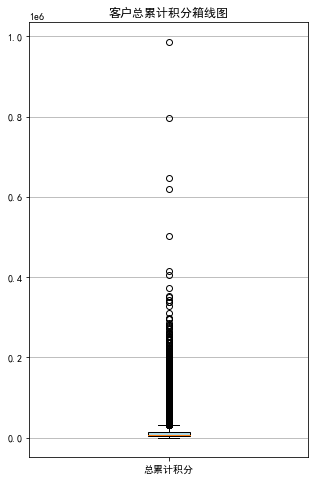

In [16]:
# 提取会员总累计积分
ps = air_data['Points_Sum']

fig = plt.figure(figsize = (5 ,8))
plt.boxplot(ps, 
            patch_artist=True,
            labels = ['总累计积分'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('客户总累计积分箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')

### 4. 相关性分析

相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   
ffp_year       -0.116510     -0.188181     0.117913   -0.171508   

                EXCHANGE_COUNT  Points_Sum       AGE  ffp_year  
FFP_TIER              0.342355    0.559249  0.076245 -0.116510  
FLIGHT_COUNT          0.502501    0.747092  0.075309 -0.188181  
LAST_TO_END          -0.169717   -0.292027 -0.027654  0.117913  
SEG_KM_SUM            0.507819    0.853014  0.087285 -0.171508  
EXCHANGE_COUNT        1.000000    0.578581  0.032760 -0.216610

f:\python3.8\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
f:\python3.8\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:183: Runtime

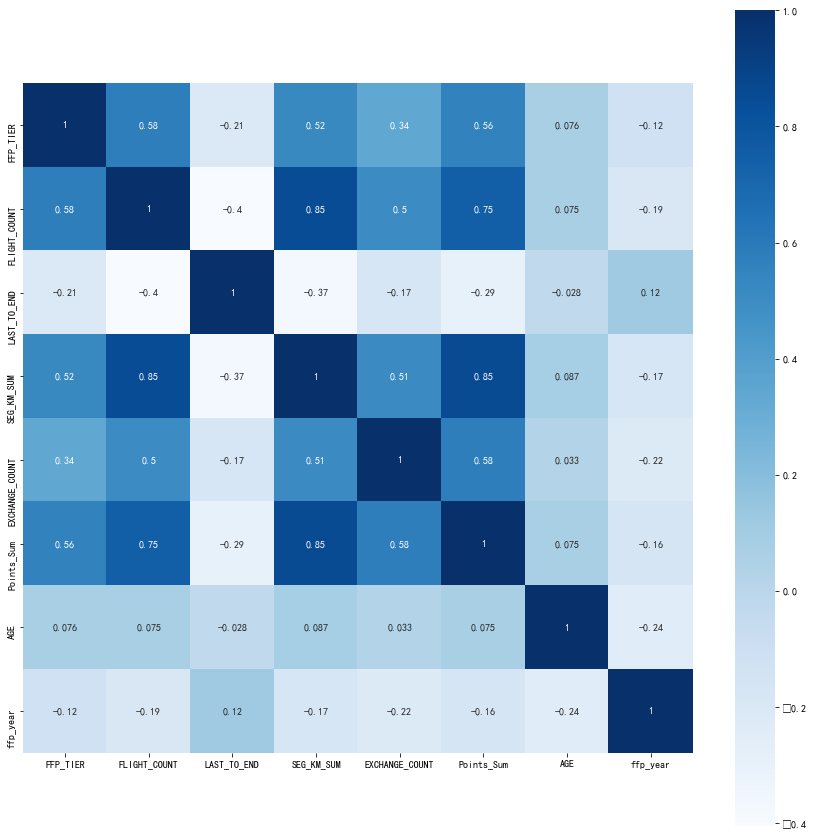

In [17]:
import seaborn as sns
data_corr = air_data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END',
                  'SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]

# 填充age
age1 = air_data['AGE'].fillna(0)
data_corr.loc[:,'AGE'] = age1.astype('int64')
data_corr.loc[:,'ffp_year'] = ffp_year

# 计算相关性矩阵
dt_corr = data_corr.corr(method = 'pearson')
print('相关性矩阵为：\n',dt_corr)

# 绘制热力图
plt.subplots(figsize=(15, 15))
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues')

可以看出部分属性间具有较强的相关性，如FLIGHT_COUNT（飞行次数）属性与SEG_KM_SUM（飞行总公里数）属性；也有部分属性与其他属性的相关性都较弱，如AGE（年龄）属性与EXCHANGE_COUNT（积分兑换次数）属性。

In [18]:
air_n_data=air_data.sample(n=1500)
air_n_data

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
13100,61198,2012/11/20,2012/11/20,女,4,玉林,广西,CN,45.0,2014/3/31,...,0,0,0,16502,15929,0.928571,0.071429,0.034721,0.965218,0
15262,48882,2009/1/16,2009/2/26,男,4,闽候,福建,CN,42.0,2014/3/31,...,0,0,0,13087,10960,0.812500,0.187500,0.162515,0.837408,0
19451,17555,2011/10/12,2011/10/12,男,4,克拉玛依,新疆,CN,38.0,2014/3/31,...,0,0,0,11591,5924,0.500000,0.500000,0.488872,0.511042,0
33458,16843,2010/3/16,2010/3/19,男,4,沈阳市,辽宁省,CN,55.0,2014/3/31,...,0,0,0,4172,3245,0.750000,0.250000,0.222142,0.777618,0
54750,25255,2012/9/26,2012/10/10,男,4,大连,辽宁,CN,46.0,2014/3/31,...,0,0,0,1700,500,0.250000,0.750000,0.705467,0.293945,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31401,61943,2011/6/9,2011/7/1,男,4,北京,北京,CN,64.0,2014/3/31,...,0,0,0,6225,5025,0.750000,0.250000,0.192740,0.807099,0
1233,12298,2008/10/1,2009/1/17,男,4,SAN DIEGO，CA92129,NaN,US,57.0,2014/3/31,...,0,0,0,43426,18159,0.454545,0.545455,0.581827,0.418150,0
60209,24910,2012/9/30,2012/11/23,女,4,武汉,湖北,CN,30.0,2014/3/31,...,0,0,0,1111,676,0.500000,0.500000,0.391187,0.607914,0
37745,10031,2007/2/22,2007/3/23,男,4,佛山,广东,CN,40.0,2014/3/31,...,0,0,0,3793,0,0.000000,1.000000,0.999736,0.000000,0


In [19]:
air_n_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 13100 to 10882
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                1500 non-null   int64  
 1   FFP_DATE                 1500 non-null   object 
 2   FIRST_FLIGHT_DATE        1500 non-null   object 
 3   GENDER                   1500 non-null   object 
 4   FFP_TIER                 1500 non-null   int64  
 5   WORK_CITY                1425 non-null   object 
 6   WORK_PROVINCE            1403 non-null   object 
 7   WORK_COUNTRY             1500 non-null   object 
 8   AGE                      1493 non-null   float64
 9   LOAD_TIME                1500 non-null   object 
 10  FLIGHT_COUNT             1500 non-null   int64  
 11  BP_SUM                   1500 non-null   int64  
 12  EP_SUM_YR_1              1500 non-null   int64  
 13  EP_SUM_YR_2              1500 non-null   int64  
 14  SUM_YR_1           

在本案例中我借鉴RFM模型把客户分为三类，分别是
重要价值客户，潜力客户，重点挽留客户

R为LAST_TO_END最近一次乘机时间到统计时间的间隔
F为FLIGHT_COUNT总共飞行次数
M为SEG_KM_SUM飞行的总公里数

在对数据集数据清洗过程中主要关注客户信息是否准确， LAST_TO_END、 FLIGHT_COUNT、 SEG_KM_SUM值是否有缺失。

In [20]:
cleanedfile='data_cleaned.csv'
print('原始数据的形状为：',air_n_data.shape)
air_notnull=air_n_data.loc[air_n_data['SUM_YR_1'].notnull()&air_data['SUM_YR_2'].notnull()]
print('删除缺失记录后的数据形状为：',air_notnull.shape)
index1=air_notnull['SUM_YR_1']!=0
index2=air_notnull['SUM_YR_2']!=0
index3=(air_notnull['SEG_KM_SUM']>0)&(air_notnull['avg_discount']!=0)
index4=air_notnull['AGE']>100
airline=air_notnull[(index1|index2)&index3&~index4]
print('清洗后的数据形状为：',airline.shape)
airline.to_csv(cleanedfile)

原始数据的形状为： (1500, 44)
删除缺失记录后的数据形状为： (1482, 44)
清洗后的数据形状为： (1479, 44)


In [21]:
airline=pd.read_csv(cleanedfile,encoding='utf-8')#读取清洗之后的文件
airline_selection=airline[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]#选取需求属性
airline_selection.head()

,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,28,14,27014
1,17,16,20961
2,162,6,27112
3,56,4,10684
4,21,4,2316


In [22]:
airline_features=pd.concat([airline_selection],axis=1)
airline_features.columns=['R','F','M']
print('RFM属性行为：\n',airline_features.head())

RFM属性行为：
      R   F      M
0   28  14  27014
1   17  16  20961
2  162   6  27112
3   56   4  10684
4   21   4   2316


f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


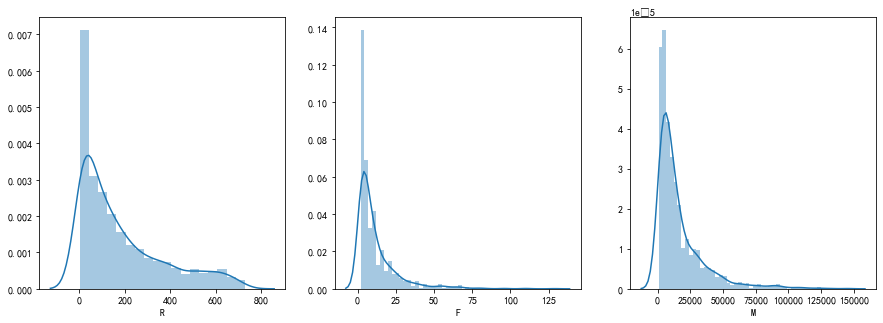

In [23]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
sns.distplot(airline_features['R'])
ax2=fig.add_subplot(1,3,2)
sns.distplot(airline_features['F'])
ax3=fig.add_subplot(1,3,3)
sns.distplot(airline_features['M'])

标准化后RFM三个属性为：
 [[-0.82595692  0.15816891  0.54649942]
 [-0.88523702  0.30208267  0.22743934]
 [-0.10381759 -0.41748613  0.55166511]
 [-0.67506214 -0.5613999  -0.31427229]
 [-0.86368062 -0.5613999  -0.75535849]]


Text(0.5, 0, 'M')

f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


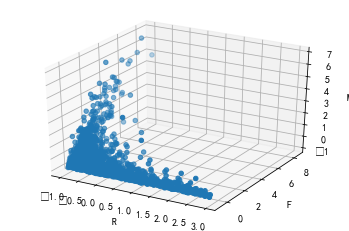

In [24]:
from sklearn.preprocessing import StandardScaler
data=StandardScaler().fit_transform(airline_features)
np.savez('./airline_scale.npz',data)
print('标准化后RFM三个属性为：\n',data[:5,:])
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter(data[:,0],data[:,1],data[:,2])
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')

          R         F         M
0 -0.491833 -0.129659 -0.036749
1  1.367407 -0.561400 -0.590742
2 -0.939128  2.460789  2.568180
各样本类别标签为
 [0. 0. 0. ... 0. 1. 0.]
最终每个类别的数目为：
             R         F         M   总数
0.0 -0.491833 -0.129659 -0.036749  947
1.0  1.367407 -0.561400 -0.590742  399
2.0 -0.939128  2.460789  2.568180  133
聚类之后的3d图



f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


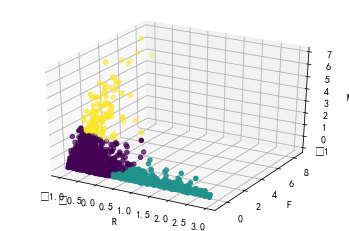

In [25]:
from sklearn.preprocessing import StandardScaler
# 正规化数据集 X
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis))
    lp_norm[lp_norm == 0] = 1
    return X / np.expand_dims(lp_norm, axis)

# 计算一个样本与数据集中所有样本的欧氏距离的平方
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    X = X.reshape(X.shape[0], -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)
    return distances


class KMedoids():
    """
    k-medoids聚类算法.


    Parameters:
    -----------
    k: int
        聚类簇的数目.
    max_iterations: int
        最大迭代次数. 
    varepsilon: float
        判断是否收敛, 如果上一次的所有k个聚类中心与本次的所有k个聚类中心的差都小于varepsilon, 
        则说明算法已经收敛
    """
    def __init__(self, k=2, max_iterations=500, varepsilon=0.0001):
        self.k = k
        self.max_iterations = max_iterations
        self.varepsilon = varepsilon

    # 随机初始化k个聚类中心
    def init_random_medoids(self, X):
        n_samples, n_features = np.shape(X)
        medoids = np.zeros((self.k, n_features))
        for i in range(self.k):
            medoid = X[np.random.choice(range(n_samples))]
            medoids[i] = medoid
        return medoids

    # 返回离该样本最近的中心的索引
    def closest_medoid(self, sample, medoids):
        distances = euclidean_distance(sample, medoids)
        closest_i = np.argmin(distances)
        return closest_i
    
    # 将每一个样本分配到与其最近的一个中心
    def create_clusters(self, X, medoids):
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            medoid_i = self.closest_medoid(sample, medoids)
            clusters[medoid_i].append(sample_i)
        return clusters

    # 计算cost (所有样本到其相应中心的距离之和)
    def calculate_cost(self, X, clusters, medoids):
        cost = 0
        # For each cluster
        for i, cluster in enumerate(clusters):
            medoid = medoids[i]
            cost += euclidean_distance(medoid, X[cluster]).sum()
        return cost

    # Returns a list of all samples that are not currently medoids
    def get_X_no_medoids(self, X, medoids):
        no_medoids = []
        for sample in X:
            if not sample in medoids:
                no_medoids.append(sample)
        return no_medoids

    # 获取每个样本的label, 方法是将每个簇的索引号记做该簇中样本的label
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(np.shape(X)[0])
        for i, cluster in enumerate(clusters):
            y_pred[cluster] = i
        return y_pred
   
    
    # Do Partitioning Around Medoids and return the cluster labels
    def predict(self, X):
        # 随机初始化self.k个中心
        medoids = self.init_random_medoids(X)
        # 进行cluster，将整个数据集中样本分配到与其最近的中心
        clusters = self.create_clusters(X, medoids)

        # 计算初始损失 (所有样本到其相应中心的距离之和)
        cost = self.calculate_cost(X, clusters, medoids)

        # 迭代, 直到 cost 不再下降
        for i in range(self.max_iterations):
            best_medoids = medoids
            lowest_cost = cost
            # 遍历所有中心(或者簇(clusters))
            for medoid in medoids:
                # 获取所有非中心的样本
                X_no_medoids = self.get_X_no_medoids(X, medoids)
                # 遍历所有非中心的样本
                for sample in X_no_medoids:
                    # Swap sample with the medoid
                    new_medoids = medoids.copy()
                    new_medoids[medoids == medoid] = sample
                    # 按照新的中心划分簇(clusters)
                    new_clusters = self.create_clusters(X, new_medoids)
                    # 计算中心更新之后的 cost
                    new_cost = self.calculate_cost(X, new_clusters, new_medoids)
                    # 如果中心更新之后的cost < 更新之前的cost, 则将中心, cost进行更新
                    if new_cost < lowest_cost:
                        lowest_cost = new_cost
                        best_medoids = new_medoids
            # If there was a swap that resultet in a lower cost we save the
            # resulting medoids from the best swap and the new cost             
            if lowest_cost < cost:
                cost = lowest_cost
                medoids = best_medoids
            # Else finished
            else:
                break
                
        # 按照最终(最优)的中心再划分簇(clusters)
        final_clusters = self.create_clusters(X, medoids)
        final=final_clusters
        # 按照最终(最优)的簇(clusters)获取所有样本的label
        return self.get_cluster_labels(final_clusters, X),medoids

def main():
    # Load the dataset
    #X, y = datasets.make_blobs(n_samples=1000, 
                               #n_features=3, 
                               #centers=[[3,3, 3], [0,0,0], [1,1,1], [2,2,2]], 
                               #cluster_std=[0.2, 0.1, 0.2, 0.2], 
                               #random_state =9)
    # 用Kmeans算法进行聚类
    X=data
    clf = KMedoids(k=3)
    y_pred,medoids= clf.predict(X)
    global cluster_center
    cluster_center=pd.DataFrame(medoids,columns=['R','F','M'])
    print(cluster_center)
    print('各样本类别标签为\n',y_pred)
    r1 = pd.DataFrame(y_pred,columns=['总数'])['总数'].value_counts()  # 统计不同类别样本的数目
    result=pd.concat([cluster_center,r1],axis=1).sort_index()
    print('最终每个类别的数目为：\n',result)
    # 可视化聚类效果
    print('聚类之后的3d图\n')
    fig=plt.figure()
    ax=plt.axes(projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2],c=y_pred)
    ax.set_xlabel('R')
    ax.set_ylabel('F')
    ax.set_zlabel('M')
    
if __name__ == "__main__":
    main()
    

f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
f:\python3.8\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


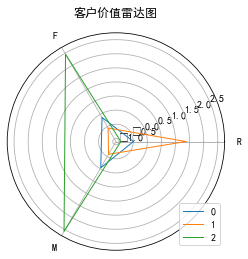

In [26]:

labels=cluster_center.columns.values
kinds=list(cluster_center.index)
result=pd.concat([cluster_center,cluster_center[[labels[0]]]],axis=1)

centers=np.array(result.iloc[:,:])

n=len(labels)
angle=np.linspace(0,2*np.pi,n,endpoint=False)
angle=np.concatenate((angle,[angle[0]]))

fig=plt.figure()
ax=fig.add_subplot(111,polar=True)

for i in range(len(kinds)):
    ax.plot(angle, centers[i], linewidth=1, label=kinds[i])

ax.set_thetagrids(angle * 180/np.pi,labels)
plt.title('客户价值雷达图')
plt.legend(loc='lower right')
plt.show()

通过观察客户价值雷达图，可以发现：
类别号为1的客户为重要价值客户，FM比较大，R比较小，说明这类客户忠诚度较高。制定营销策略时，我们可以选择把优惠力度最大的优惠方案给重要价值顾客，可以引导让这部分客户为我们带来新的客户。

类别号为2的客户为潜力客户，RFM都处于中等水平。这类客户忠诚度低于重要价值客户，但又高于重点挽留客户。对于这部分客户我们可以采取调查问卷的形式调查他们对本航空公司的看法，了解他们的需求，进行改进，在促销方面可以采用梯度优惠的方法来激励他们多乘坐我们公司的航班（比如累计乘坐3次，机票打9.5折，累计8次打8.5折，15次以上打5折），激励使他们发展成重要价值客户。

类别为0的客户为重点挽留客户，这部分客户可能有的已经流失，所以我们要采取措施挽留这些客户，可以通过调查问卷来了解他们对我们公司航班的意见与建议。之后针对相应的建议进行改进，可以采取发放优惠券的方式来激励他们再次乘坐本公司的航班。